In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [71]:
df=pd.read_csv("wine_data.csv",header=None,usecols=[0,1,2])
df.head()

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [72]:
df=df.rename(columns={0:"class_label",1:"alcohal",2:'malicacid'})
df.head()

,class_label,alcohal,malicacid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [103]:
np.round(df.describe())

,class_label,alcohal,malicacid
count,178.0,178.0,178.0
mean,2.0,13.0,2.0
std,1.0,1.0,1.0
min,1.0,11.0,1.0
25%,1.0,12.0,2.0
50%,2.0,13.0,2.0
75%,3.0,14.0,3.0
max,3.0,15.0,6.0


In [41]:
df["class_label"].value_counts()

class_label
2    71
1    59
3    48
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class_label  178 non-null    int64  
 1   alcohal      178 non-null    float64
 2   malicacid    178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='alcohal', ylabel='Density'>

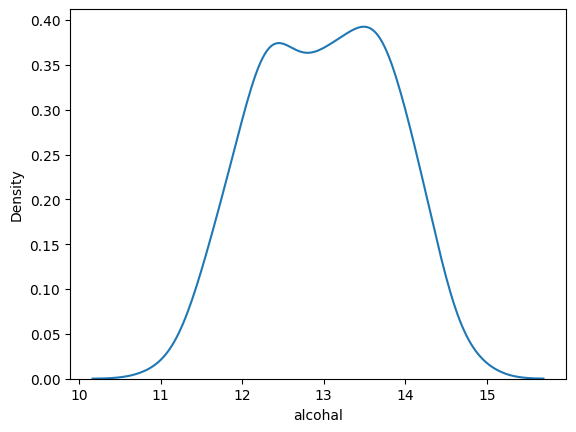

In [44]:
sns.kdeplot(df["alcohal"])

<Axes: xlabel='malicacid', ylabel='Density'>

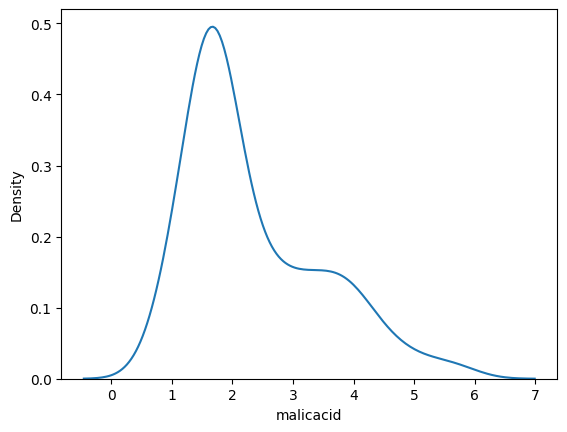

In [45]:
sns.kdeplot(df["malicacid"])

In [46]:
color_dict={1:"red",2:"blue",3:"green"}

<Axes: xlabel='alcohal', ylabel='malicacid'>

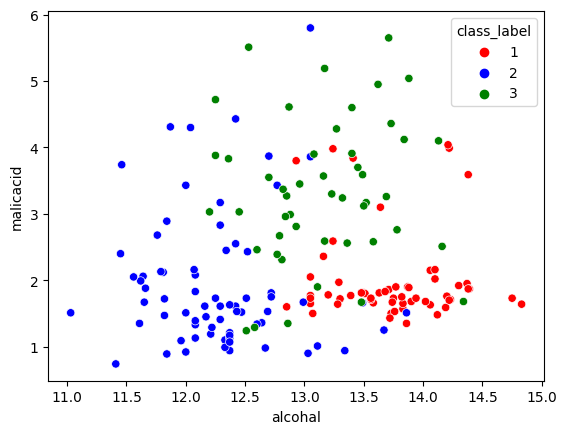

In [56]:
sns.scatterplot(x=df['alcohal'],y=df['malicacid'],hue=df["class_label"],palette=color_dict)

In [57]:
from sklearn.model_selection import train_test_split

In [75]:
df1=df[["alcohal","malicacid"]]
df1

,alcohal,malicacid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59
...,...,...
173,13.71,5.65
174,13.40,3.91
175,13.27,4.28
176,13.17,2.59


In [76]:
df2=df["class_label"]
df2

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class_label, Length: 178, dtype: int64

In [78]:
x_train,x_test,y_train,y_test=train_test_split(df1,df2,test_size=0.2)

In [84]:
x_train.shape

(142, 2)

In [85]:
x_test.shape

(36, 2)

In [86]:
y_train.shape

(142,)

In [87]:
y_test.shape

(36,)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler=MinMaxScaler()

In [90]:
scaler.fit(x_train,y_train)

MinMaxScaler()

In [91]:
x_train_scaled=scaler.transform(x_train)

In [92]:
x_test_scaled=scaler.transform(x_test)

In [95]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled

,alcohal,malicacid
0,0.544643,0.120553
1,0.738095,0.209486
2,0.398810,0.084980
3,0.833333,0.164032
4,0.125000,0.328063
...,...,...
137,0.502976,0.211462
138,0.997024,0.223320
139,0.809524,0.195652
140,0.502976,0.199605


In [96]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled

,alcohal,malicacid
0,0.741071,0.480237
1,0.848214,0.849802
2,0.497024,0.555336
3,0.232143,0.272727
4,1.107143,0.195652
5,0.187500,0.225296
6,0.413690,0.357708
7,0.601190,0.179842
8,0.833333,0.179842
9,0.687500,0.039526


In [100]:
np.round(df.describe())

,class_label,alcohal,malicacid
count,178.0,178.0,178.0
mean,2.0,13.0,2.0
std,1.0,1.0,1.0
min,1.0,11.0,1.0
25%,1.0,12.0,2.0
50%,2.0,13.0,2.0
75%,3.0,14.0,3.0
max,3.0,15.0,6.0


In [99]:
np.round(x_train.describe())

,alcohal,malicacid
count,142.0,142.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,14.0,6.0


In [102]:
np.round(x_test.describe())

,alcohal,malicacid
count,36.0,36.0
mean,13.0,2.0
std,1.0,1.0
min,12.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,2.0
max,15.0,5.0


In [110]:
import matplotlib.pyplot as plt

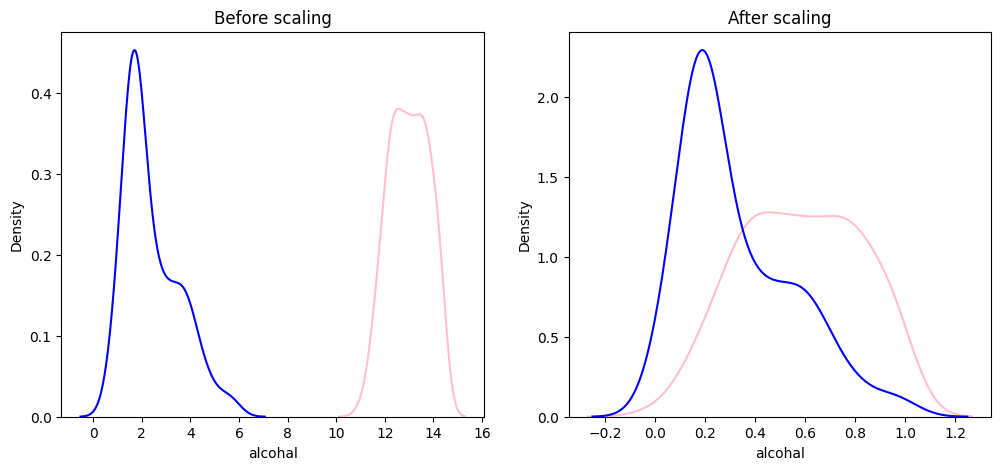

In [125]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.kdeplot(x_train["alcohal"],ax=ax1,color="pink")
sns.kdeplot(x_train["malicacid"],ax=ax1,color="blue")
ax2.set_title("After scaling")
sns.kdeplot(x_train_scaled["alcohal"],ax=ax2,color="pink")
sns.kdeplot(x_train_scaled["malicacid"],ax=ax2,color='blue')
plt.show()             

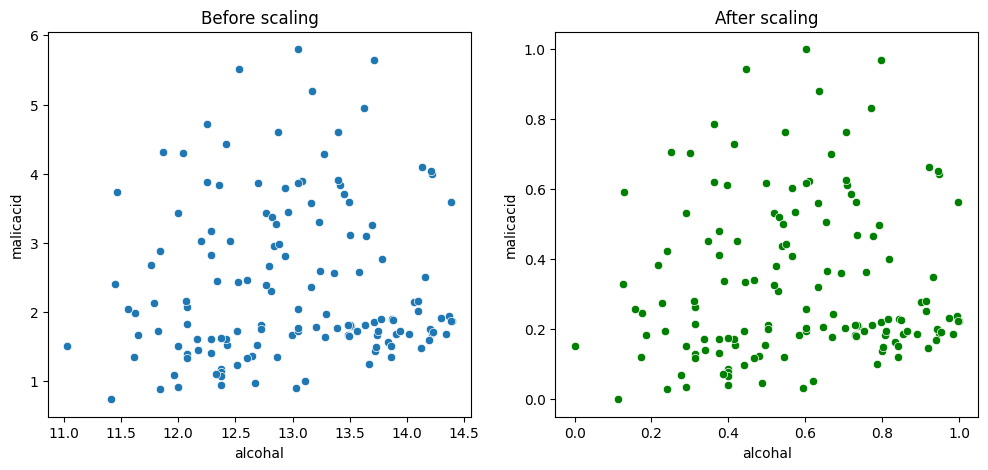

In [136]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.scatterplot(x=x_train["alcohal"],y=x_train["malicacid"],ax=ax1)
ax2.set_title("After scaling")
sns.scatterplot(x=x_train_scaled["alcohal"],y=x_train_scaled["malicacid"],ax=ax2,color="green")
plt.show()